## Import packages and load data

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
print (my_data.head())
print (my_data.shape)

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY
(200, 6)


## Pre-processing

In [3]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = my_data[['Drug']].values
print (X[:5])
print (y[:5])

[[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.114]
 [28 'F' 'NORMAL' 'HIGH' 7.798]
 [61 'F' 'LOW' 'HIGH' 18.043]]
[['drugY']
 ['drugC']
 ['drugC']
 ['drugX']
 ['drugY']]


In [4]:
# Transform Nominal features with Numerical ones
# Nominal features are: Age, Sex, BP, and Cholesterol

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
X[:,1] = le_sex.transform(X[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

X[:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [5]:
# split data into train/test with 0.3 rate

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print ("Train set for X: ", x_train.shape, "for y: ", y_train.shape) 
print ("Test set for X: ", x_test.shape, "for y: ", y_test.shape)

Train set for X:  (140, 5) for y:  (140, 1)
Test set for X:  (60, 5) for y:  (60, 1)


## Modeling

In [6]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
drugTree.fit(x_train, y_train)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Prediction

In [9]:
predTree = drugTree.predict(x_test)
print (y_test[:5])
print (predTree[:5])

[['drugY']
 ['drugX']
 ['drugX']
 ['drugX']
 ['drugX']]
['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


## Evaluation

In [10]:
f1_macro = metrics.f1_score(y_test, predTree, average='macro')
f1_micro = metrics.f1_score(y_test, predTree, average='micro')
f1_weighted = metrics.f1_score(y_test, predTree, average='weighted')

print ("DecisionTree's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print ('F1_scores are: macro',f1_macro)
print ('F1_scores are: micro',f1_micro)
print ('F1_scores are: weighted',f1_weighted)

DecisionTree's Accuracy:  0.9833333333333333
F1_scores are: macro 0.9906775067750677
F1_scores are: micro 0.9833333333333333
F1_scores are: weighted 0.9833152664859981


## Plot the Tree with Graphviz and pydotplus package

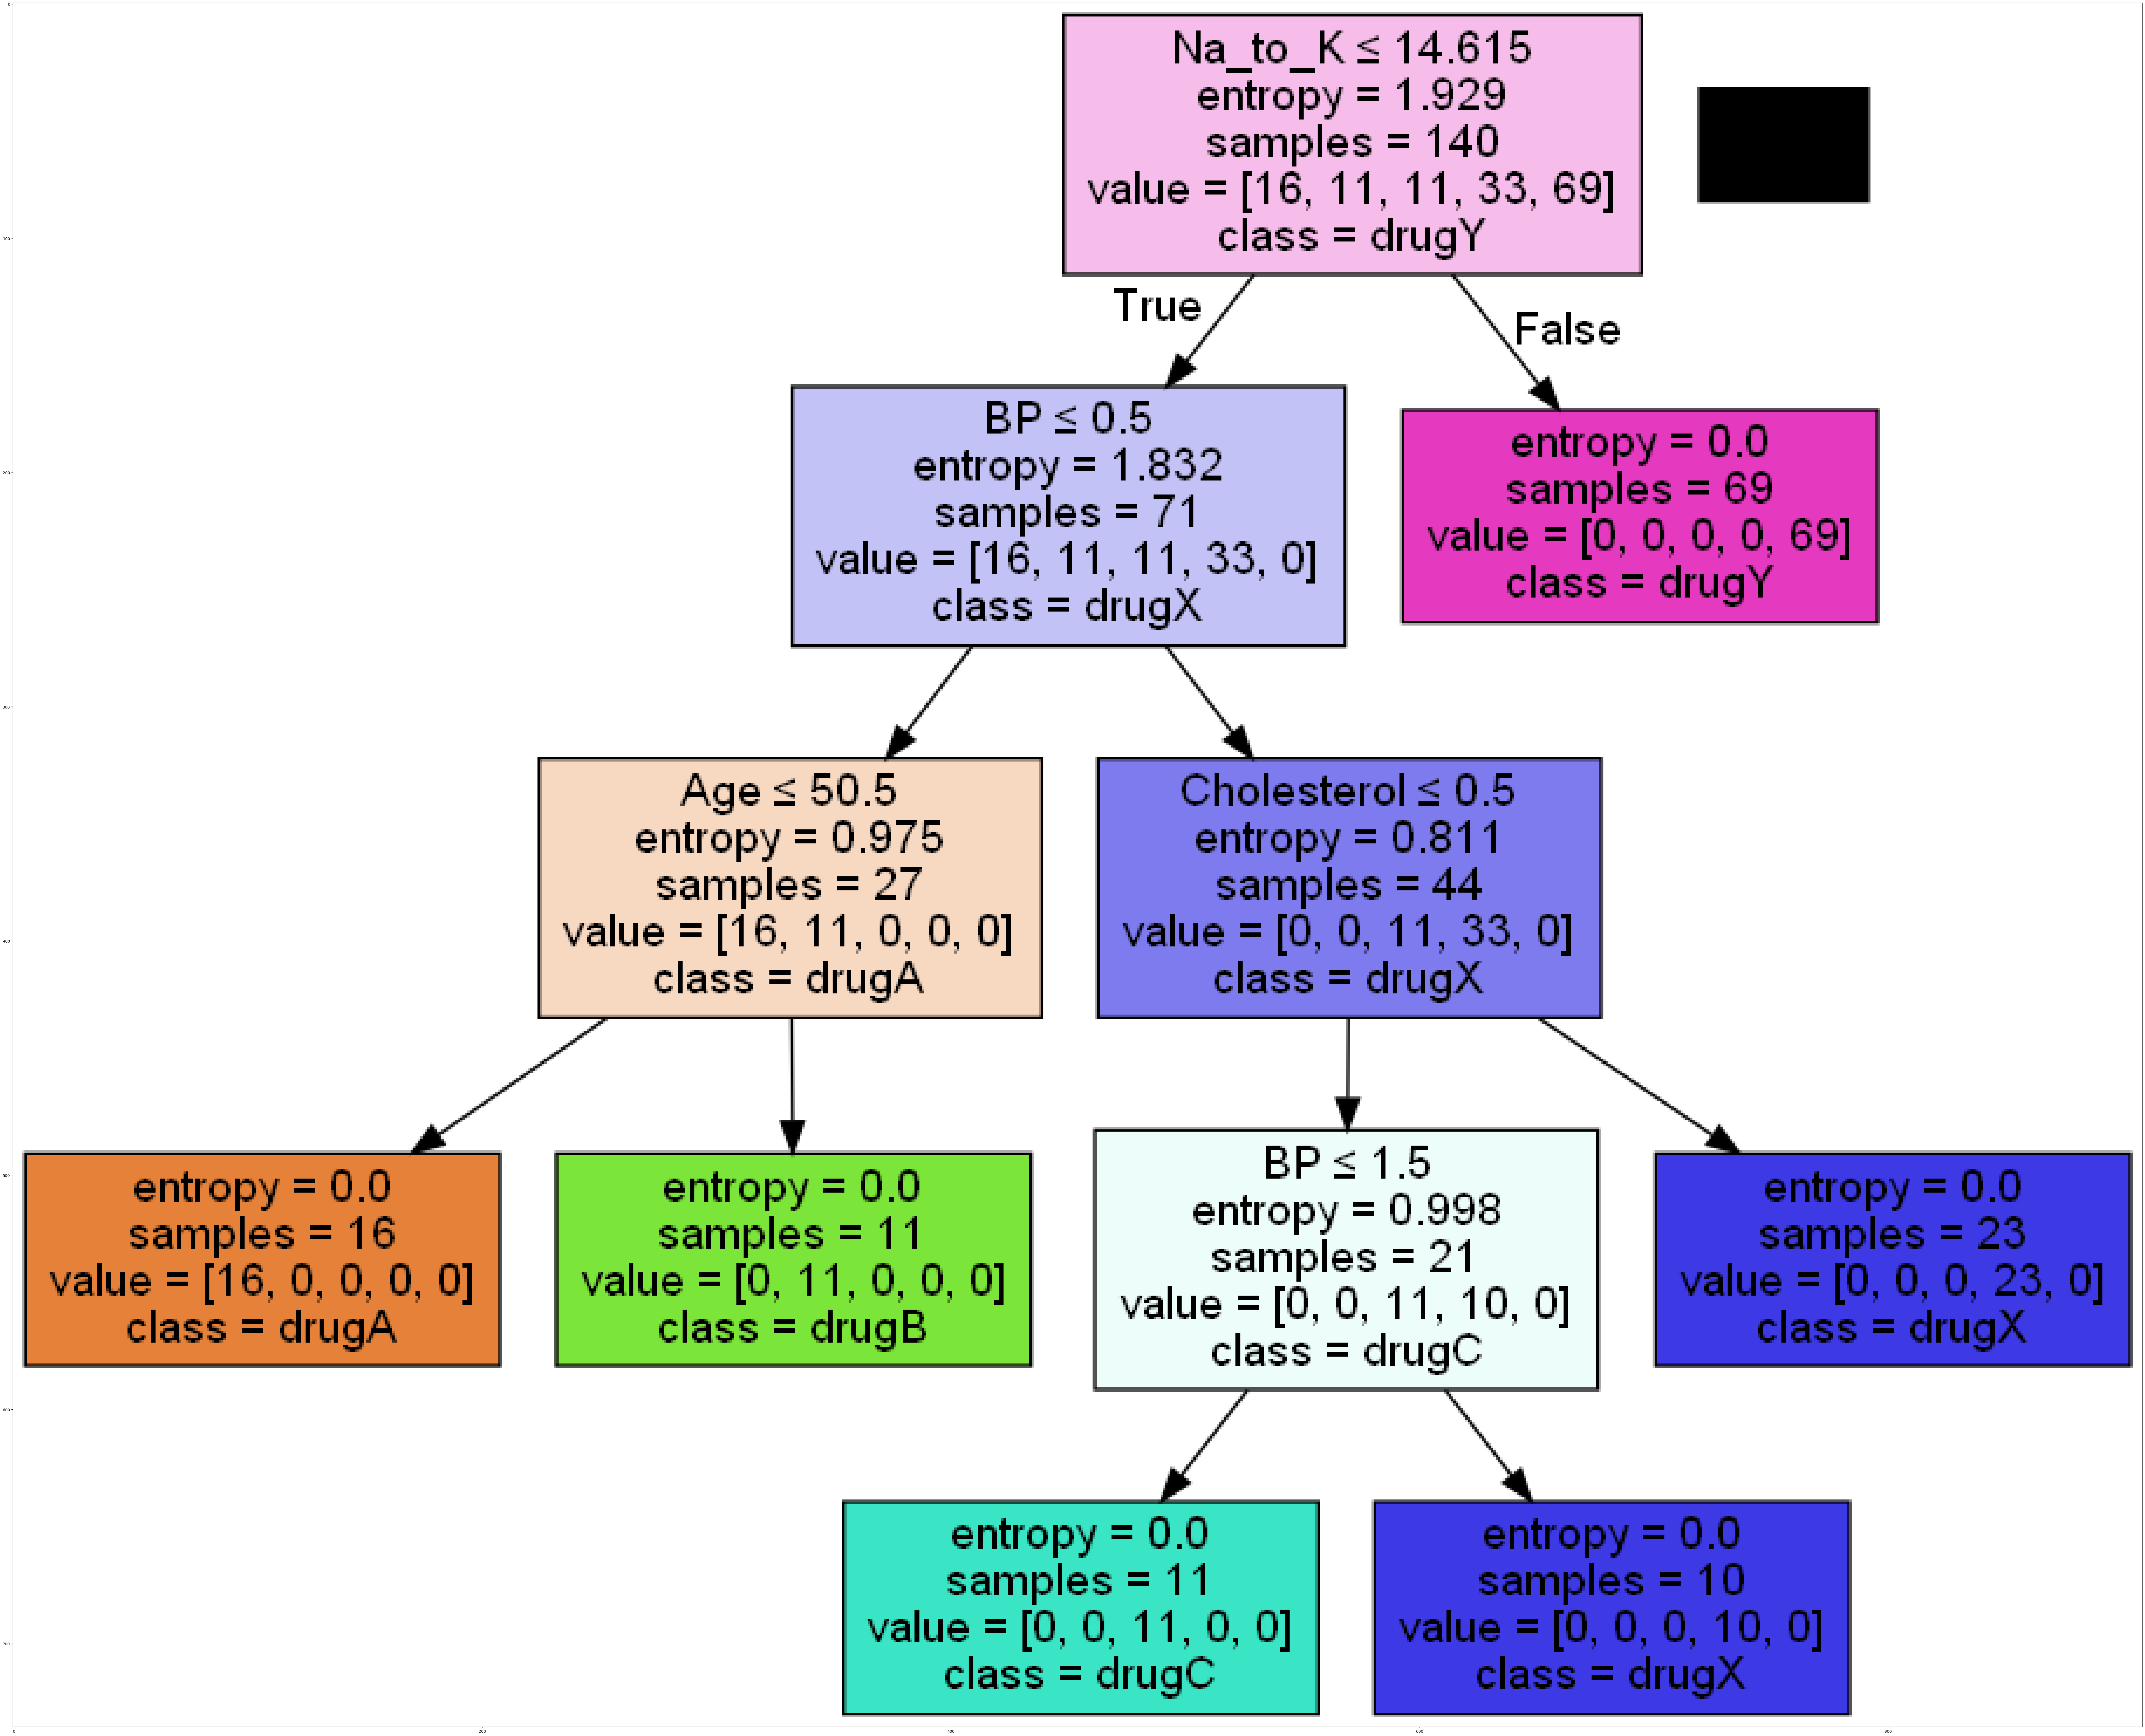

In [12]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree


dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')